#Jamboree Education - Linear Regression


> Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


> This analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.





---




Importing the dataset

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

--2024-12-08 03:02:10--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.64.229.135, 18.64.229.91, 18.64.229.172, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.64.229.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree_Admission.csv.1’

Jamboree_Admission. 100%[===================>]  15.80K  --.-KB/s    in 0.001s  

2024-12-08 03:02:10 (29.2 MB/s) - ‘Jamboree_Admission.csv.1’ saved [16176/16176]



## 1. Define Problem Statement and perform Exploratory Data Analysis

This analysis is aimed to help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. The correlation of different factors with the target variable are to be analysed as well as between different variables. The relation can be verified by formulating a Linear Regression model using the variables.
It will also help predict one's chances of admission given the rest of the variables.

In [ ]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#creating dataframe using the csv data
df=pd.read_csv('Jamboree_Admission.csv')

In [ ]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


**Column Profiling:**



1.   Serial No. (Unique row ID)
1.   GRE Scores (out of 340)
1.   TOEFL Scores (out of 120)
1.   University Rating (out of 5)
2.   Statement of Purpose Strength (out of 5)
2.   Letter of Recommendation Strength (out of 5)
2.   Undergraduate GPA (out of 10)
2.   Research Experience (either 0 or 1)
2.   Chance of Admit (ranging from 0 to 1)

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Correcting space errors in column names

In [ ]:
df.rename({'LOR ':'LOR','Chance of Admit ':'Chance of Admit'},inplace=True,axis=1)

In [ ]:
#shape of data
df.shape

(500, 9)

Data contains 500 entries with 9 columns

In [ ]:
#data types of columns of df
df.dtypes

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [ ]:
#statistical summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
#null value detection
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


There is no null value present in the dataset.

In [ ]:
#statistical summary
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df['Research'].value_counts()

,count
Research,
1,280
0,220


##Univariate Analysis

<ipython-input-55-9a34d54c45c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GRE Score'])
<ipython-input-55-9a34d54c45c1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TOEFL Score'])


<Axes: xlabel='TOEFL Score', ylabel='Density'>

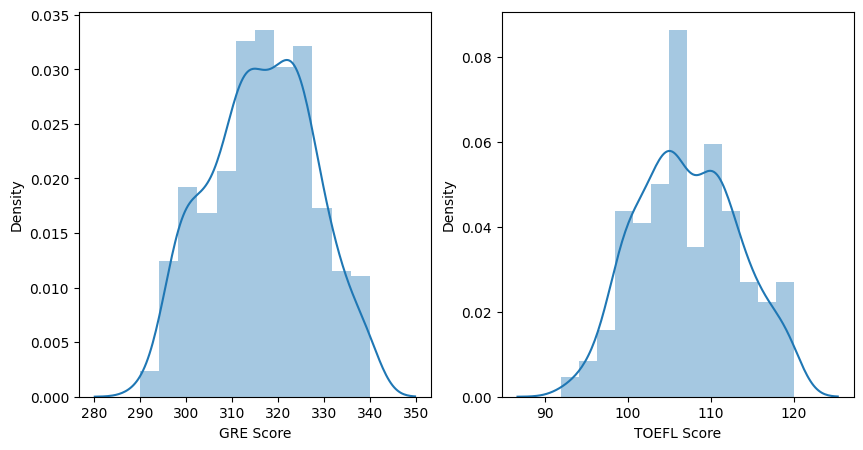

In [ ]:
#distribution plot for GRE and TOEFL scores
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['GRE Score'])
plt.subplot(1,2,2)
sns.distplot(df['TOEFL Score'])

<ipython-input-17-185909034e3d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'])


<Axes: xlabel='CGPA', ylabel='Density'>

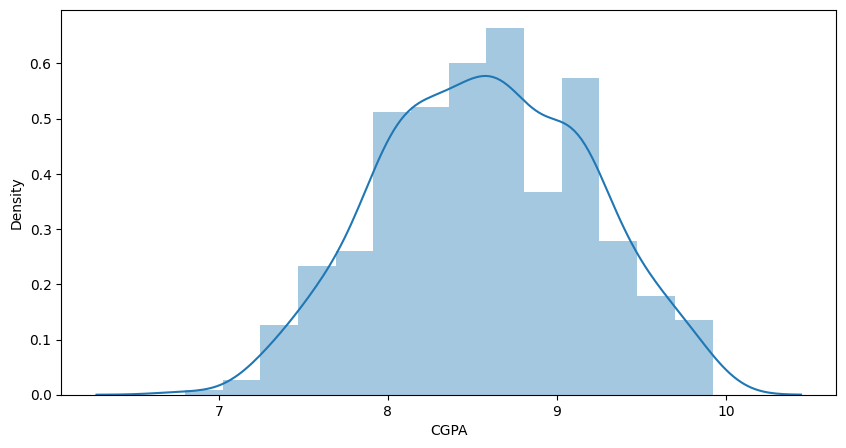

In [ ]:
#distribution of CGPA
plt.figure(figsize=(10,5))
sns.distplot(df['CGPA'])

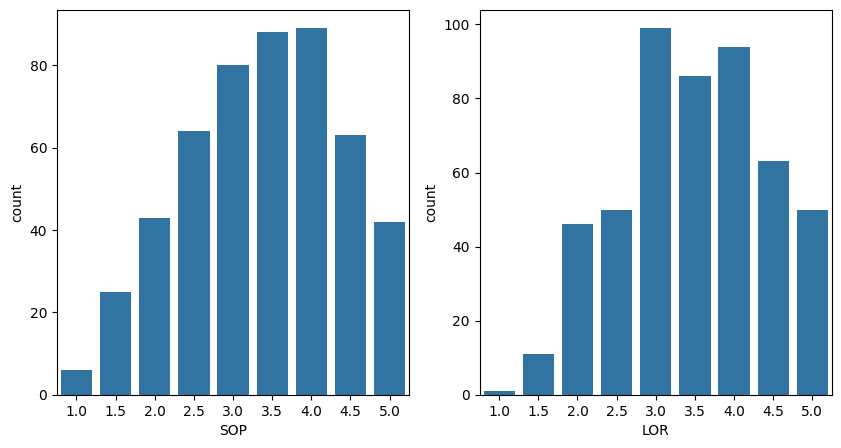

In [ ]:
#count plot of SOP and LOR
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='SOP')
plt.subplot(1,2,2)
sns.countplot(data=df,x='LOR')
plt.show()

<Axes: xlabel='University Rating', ylabel='count'>

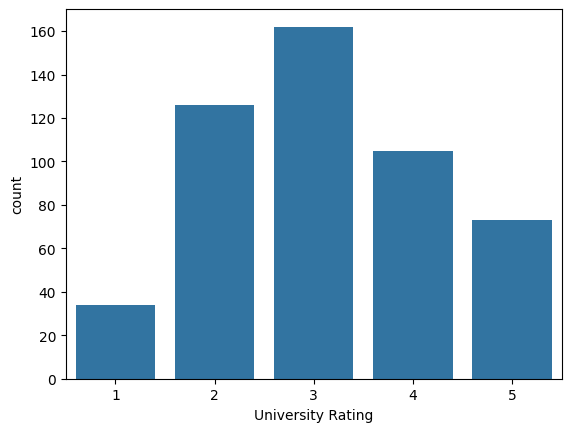

In [ ]:
#Count plot for university rating
sns.countplot(data=df,x='University Rating')

<Axes: xlabel='Research', ylabel='count'>

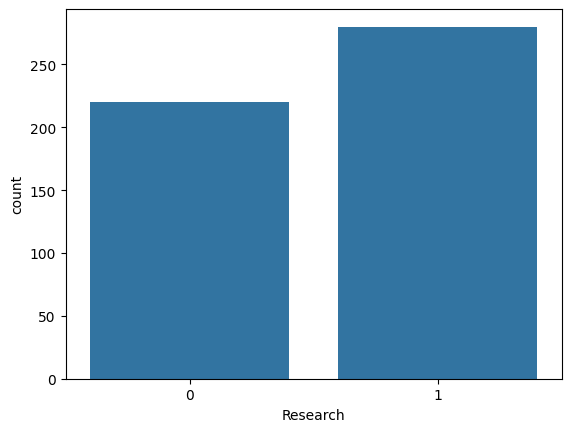

In [ ]:
#countplot for whether research done or not
sns.countplot(data=df,x='Research')

<ipython-input-42-b597abf0e595>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Chance of Admit'])


<Axes: xlabel='Chance of Admit', ylabel='Density'>

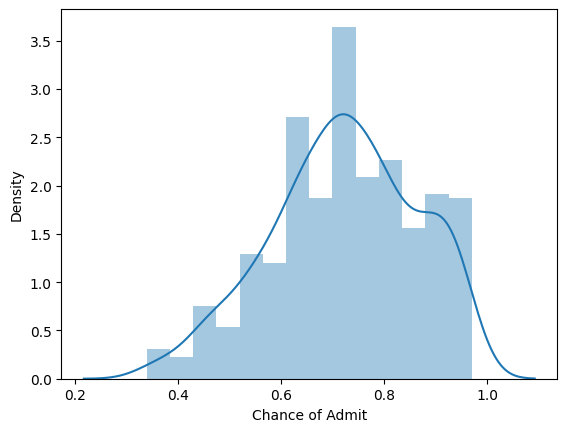

In [ ]:
#distribution of chance of getting admitted
sns.distplot(df['Chance of Admit'])

In [ ]:
df['Chance of Admit'].describe()

,Chance of Admit
count,500.00000
mean,0.72174
std,0.14114
min,0.34000
25%,0.63000
50%,0.72000
75%,0.82000
max,0.97000


###Bivariate Analysis

<Axes: xlabel='University Rating', ylabel='Chance of Admit'>

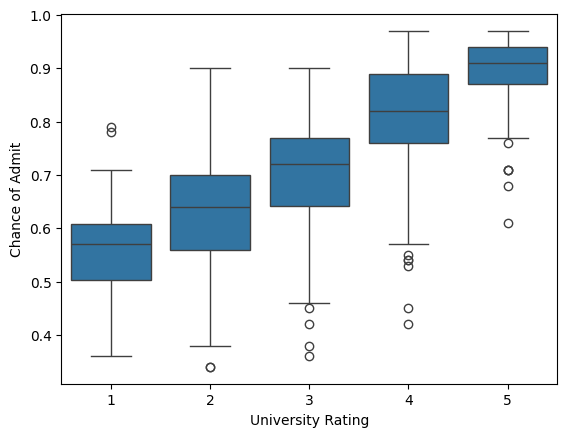

In [ ]:
#boxplot of Chance of Admit for different university ratings
sns.boxplot(data=df,x='University Rating',y='Chance of Admit')

<Axes: xlabel='Research', ylabel='Chance of Admit'>

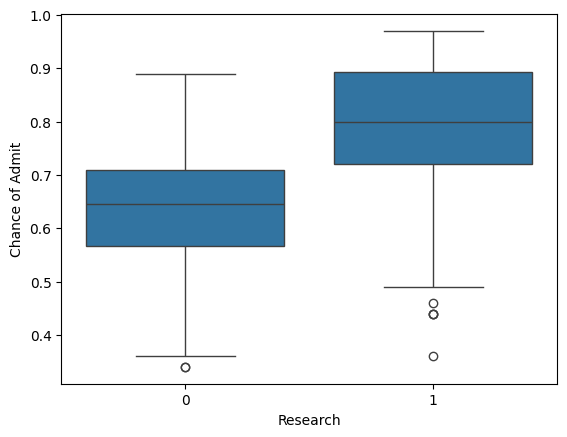

In [ ]:
#boxplot for chance for admit for research experience
sns.boxplot(data=df,x='Research',y='Chance of Admit')

<Axes: ylabel='Chance of Admit'>

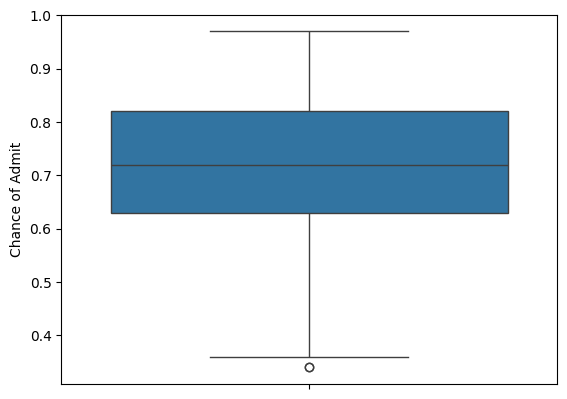

In [ ]:
#boxplot of chance of admitance
sns.boxplot(data=df,y='Chance of Admit')

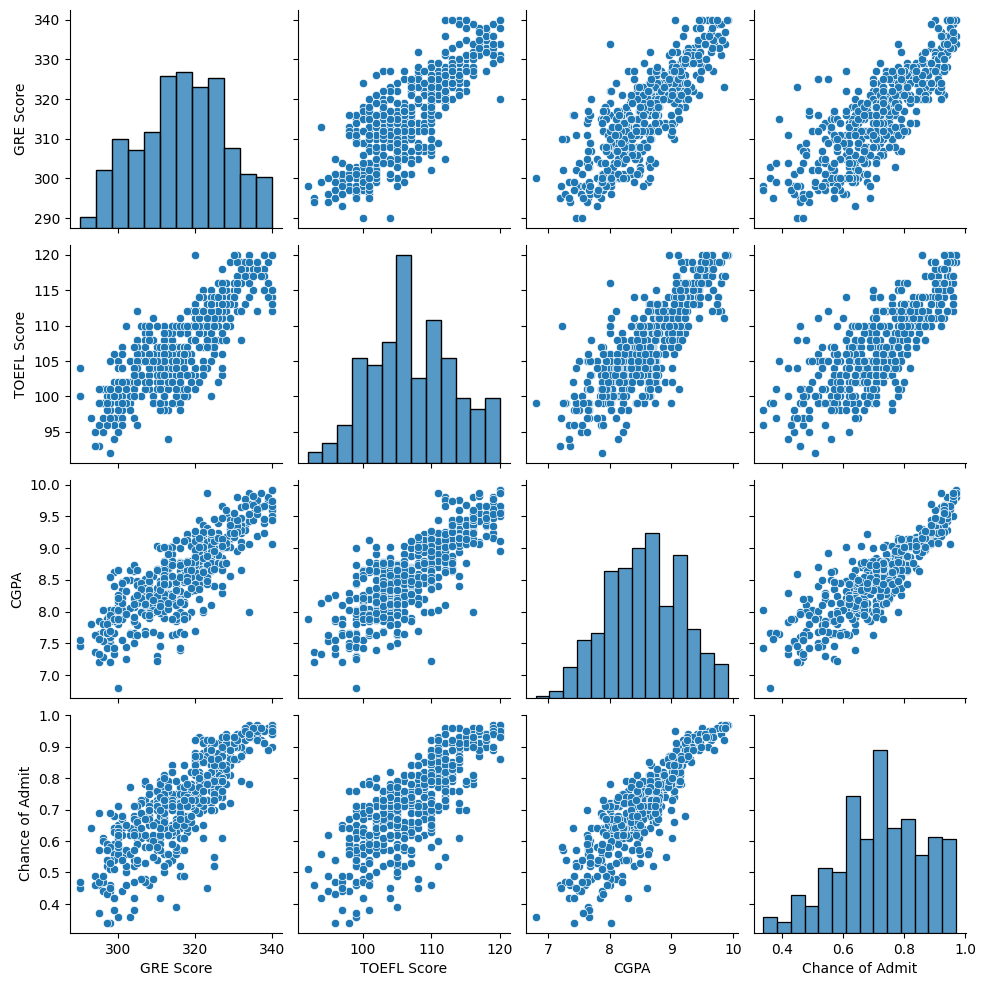

In [ ]:
#Pairplot between numerical attributes
sns.pairplot(df[['GRE Score','TOEFL Score','CGPA','Chance of Admit']])

##Insights on EDA




> 1.   The data contains 500 entries of students and 8 attributes like GRE score and TOEFL score.
1.   GRE scores vary from 290 to 340 where TOEFL score vary from 92 to 120. They follow non normal distribution with mean value of 316.47 and 207.19 respectively.
2.   CGPA is varying from 6.8 to 9.92. It follows a normal distribution with mean value of 8.58
1.   280 students among the 500 have research experience.
2.   There are few outliers when analysed based on research experience and university rating. When analysed the data as whole there were only one outlier present.
1.   Pair plot indicate there are positive correlation between GRE score, TOEFL score, CGPA and the Chance of admit




---



##2.Data Preprocessing

In [ ]:
#duplicate value check
df.duplicated().sum()

0

In [ ]:
#missing value check
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


<Axes: ylabel='Chance of Admit'>

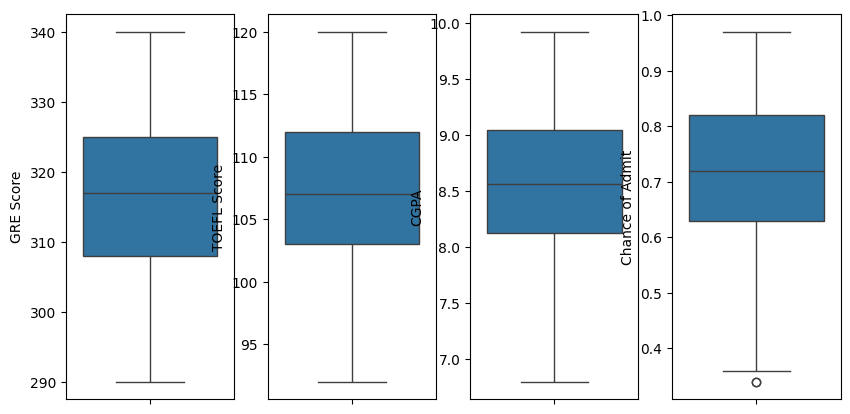

In [ ]:
#outlier detection
plt.figure(figsize=(10,5))
plt.subplot(1,4,1)
sns.boxplot(df['GRE Score'])
plt.subplot(1,4,2)
sns.boxplot(df['TOEFL Score'])
plt.subplot(1,4,3)
sns.boxplot(df['CGPA'])
plt.subplot(1,4,4)
sns.boxplot(df['Chance of Admit'])

The features shows no outliers hence no outlier treatment is done.

Feature engineering and preperation for modeling


In [ ]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


Here the Serial number column is removed and all the other features are scaled using minmax scaler. The target variable i.e, chance of admit is seperated from the features before scaling


In [ ]:
#dropping Serial No. column
df.drop('Serial No.',axis=1,inplace=True)

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
#importing necesasary packages
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
y=df['Chance of Admit']

In [ ]:
X=df.drop('Chance of Admit',axis=1)

In [ ]:
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152




---



##3.Model Building

In [ ]:
#train test split of X and y into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
#importing linear regression,ridge regression and lasso regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 0.02002784,  0.016235  ,  0.00798136, -0.00050995,  0.01542728,
        0.07562457,  0.01177686])

In [ ]:
model.intercept_

0.7195856575575589

In [ ]:
model.score(X_train,y_train)

0.8211364094801954

In [ ]:
#Model coeffiecients with column names
print(list(zip(X_train.columns,np.round(model.coef_,4))))

[('GRE Score', 0.02), ('TOEFL Score', 0.0162), ('University Rating', 0.008), ('SOP', -0.0005), ('LOR', 0.0154), ('CGPA', 0.0756), ('Research', 0.0118)]




*   CGPA is the most impactful factor in deciding the chance of admitance.
*   GRE and TOEFL scores have similar positive correlation with chance of admitance.
*   Letter of Recommendation Strength and Research experience have positive correlation with chance of admitance.
*   University rating  has weak and postive correlation with the chance of admitance.
*   Statement of Purpose Strength have a weak and negative correlation with chance of admitance.






From above distribution degree 3 is taken as optimal for Polynomial Regression

In [ ]:
#Ridge Regression
ridge=Ridge(0.01)
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [ ]:
print('Coeffiecient are:',ridge.coef_)
print('Intercept is:',ridge.intercept_)

Coeffiecient are: [0.02318977 0.01547899 0.0047641  0.00082667 0.01524115 0.07191463
 0.01376515]
Intercept is: 0.7233992085682699


In [ ]:
#Model coeffiecients with column names
print(list(zip(X_train.columns,np.round(ridge.coef_,4))))

[('GRE Score', 0.0232), ('TOEFL Score', 0.0155), ('University Rating', 0.0048), ('SOP', 0.0008), ('LOR', 0.0152), ('CGPA', 0.0719), ('Research', 0.0138)]


In [ ]:
#Lasso Regression
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [ ]:
print('Coeffiecient are:',lasso.coef_)
print('Intercept is:',lasso.intercept_)

Coeffiecient are: [0.02317615 0.01286142 0.00301094 0.         0.010982   0.07094789
 0.00799361]
Intercept is: 0.7230789809666763


In [ ]:
#Model coeffiecients with column names
print(list(zip(X_train.columns,np.round(lasso.coef_,4))))

[('GRE Score', 0.0232), ('TOEFL Score', 0.0129), ('University Rating', 0.003), ('SOP', 0.0), ('LOR', 0.011), ('CGPA', 0.0709), ('Research', 0.008)]




---



##4.Testing the assumptions of the linear regression model
###1.Multicollinearity check by VIF score

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,5.32
0,GRE Score,4.62
1,TOEFL Score,3.70
3,SOP,3.47
2,University Rating,2.91
4,LOR,1.94
6,Research,1.46


In [ ]:
X_tr2=X_train.drop(['CGPA'],axis=1)


In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_tr2.columns
vif['VIF'] = [variance_inflation_factor(X_tr2.values, i) for i in range(X_tr2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,3.63
1,TOEFL Score,3.43
3,SOP,3.05
2,University Rating,2.90
4,LOR,1.93
5,Research,1.46


###2.The mean of residuals is nearly zero

In [ ]:
#yhat as predicted values for training features
y_hat=model.predict(X_train)

In [ ]:
#error is difference between train target variable values and y hat
error=y_train-y_hat

In [ ]:
#mean value of errors
error.mean()

-7.882583474838611e-17

Mean of residuals are found to be very small value i.e ~0

###3.Linearity of variables

Text(0, 0.5, 'error')

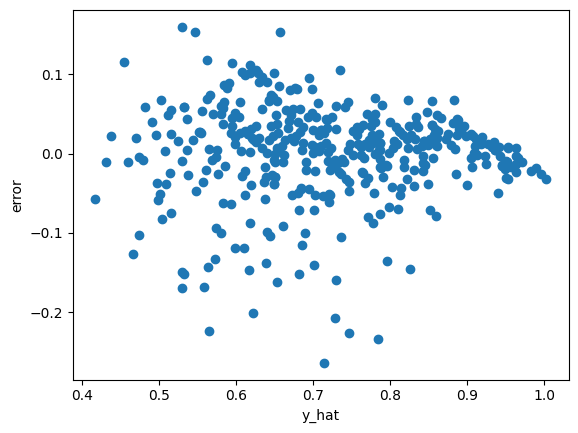

In [ ]:
#Plot of residuals against y value
plt.scatter(y_hat,error)
plt.xlabel('y_hat')
plt.ylabel('error')

Since there is no pattern in the residual plot, the data can be treated as linear.

###4.Test for Homoscedasticity

Goldfeld-Quandt test

In [ ]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
# H0: The is not heteroscedistic
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 1.0263634562780242), ('p-value', 0.4283731295543819)]

p-value > alpha for a confidence level of 90% and the data is homoscedastic

###5.Normality of residuals

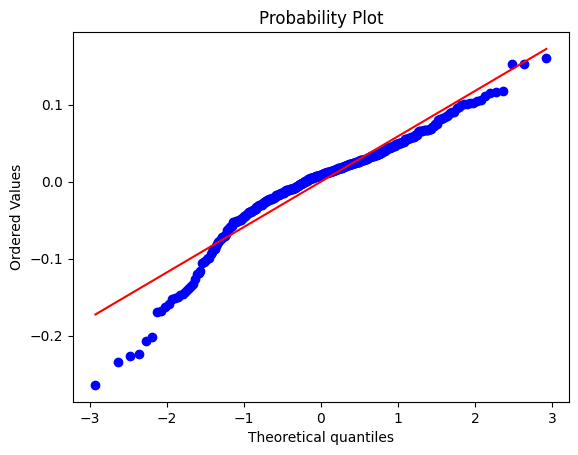

In [ ]:
#qq plot of residuals
import pylab
import scipy.stats as stats
stats.probplot(error, dist="norm", plot=pylab)
pylab.show()

The QQ plot shows the residuals are almost aligned in the straight line. The residuals are Normal.



---



##5.Model performance evaluation

In [ ]:
#importing mse and mae
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse

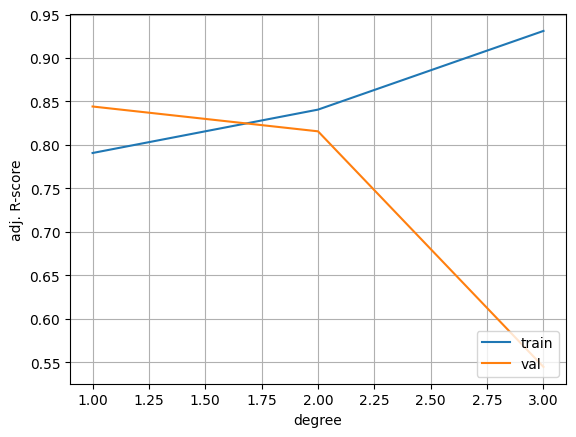

In [ ]:
#CHECKING THE SCORE OF REGRESSION AT DIFFERENT DEGREES
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
def adj_r2(X,Y,r_sq):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=5)
max_degree = 4 # max polynomial degree
train_scores = []
val_scores = []
for degree in range(1, max_degree):
  polyreg_scaled = make_pipeline(PolynomialFeatures(degree), Ridge())
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
  train_scores.append(train_score)
  val_scores.append(val_score)
plt.figure()
plt.plot(list(range(1, max_degree)), train_scores, label="train")
plt.plot(list(range(1, max_degree)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

Applying Linear Regression

In [ ]:
#train test split of X and y into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Model coeffiecients with column names
print(list(zip(X_train.columns,np.round(model.coef_,4))))

[('GRE Score', 0.02), ('TOEFL Score', 0.0162), ('University Rating', 0.008), ('SOP', -0.0005), ('LOR', 0.0154), ('CGPA', 0.0756), ('Research', 0.0118)]


In [ ]:
#storing the key metrices
y_pred=model.predict(X_test)
metric={}
metric['RMSE']=np.sqrt(mse(y_test,y_pred))
metric['MAE']=mae(y_test,y_pred)
metric['r2']=model.score(X_test,y_test)
metric['adj_r2']=adj_r2(X_test,y_test,model.score(X_test,y_test))

In [ ]:
metricdf=pd.DataFrame(metric,index=['Linear Regression'])

In [ ]:
metricdf

,RMSE,MAE,r2,adj_r2
Linear Regression,0.054028,0.041735,0.821479,0.807896


In [ ]:
#Ridge regression
ridge=Ridge(0.01)
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [ ]:
#storing key metrices
y_pred=ridge.predict(X_test)
metric['RMSE']=np.sqrt(mse(y_test,y_pred))
metric['MAE']=mae(y_test,y_pred)
metric['r2']=ridge.score(X_test,y_test)
metric['adj_r2']=adj_r2(X_test,y_test,ridge.score(X_test,y_test))
metricdf=pd.concat([metricdf,pd.DataFrame(metric,index=['Ridge Regression'])])

In [ ]:
#Lasso Regression
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [ ]:
#storing the metrices
y_pred=lasso.predict(X_test)
metric['RMSE']=np.sqrt(mse(y_test,y_pred))
metric['MAE']=mae(y_test,y_pred)
metric['r2']=lasso.score(X_test,y_test)
metric['adj_r2']=adj_r2(X_test,y_test,lasso.score(X_test,y_test))
metricdf=pd.concat([metricdf,pd.DataFrame(metric,index=['Lasso Regression'])])

In [ ]:
metricdf

,RMSE,MAE,r2,adj_r2
Linear Regression,0.054028,0.041735,0.821479,0.807896
Ridge Regression,0.054027,0.041734,0.821483,0.807900
Lasso Regression,0.054107,0.040469,0.820955,0.807333


In [ ]:
#train and test performance of Linear Regression
y_pred=model.predict(X_test)
y_hat=model.predict(X_train)
train_test={}
train_test['RMSE']=np.sqrt(mse(y_test,y_pred))
train_test['MAE']=mae(y_test,y_pred)
train_test['r2']=model.score(X_test,y_test)
train_test['adj_r2']=adj_r2(X_test,y_test,model.score(X_test,y_test))
train_testdf=pd.DataFrame(train_test,index=['Test Metrics'])
train_test['RMSE']=np.sqrt(mse(y_train,y_hat))
train_test['MAE']=mae(y_train,y_hat)
train_test['r2']=model.score(X_train,y_train)
train_test['adj_r2']=adj_r2(X_train,y_train,model.score(X_train,y_train))
train_testdf=pd.concat([train_testdf,pd.DataFrame(train_test,index=['Train Metrics'])])

In [ ]:
train_testdf

,RMSE,MAE,r2,adj_r2
Test Metrics,0.054028,0.041735,0.821479,0.807896
Train Metrics,0.060909,0.043372,0.821136,0.817942




1.   The Error metrics i.e., RMSE and MAE are found to be low.
2.   R2 score and adjusted R2 score are in range of 0.8
1.   The model is found to be good fit for the test data.
2.   The model can be optimised for further improvement of r2 score.







---



##6.Actionable Insights & Recommendations

>  
*   The most significant predictor variable is CGPA. Followed by GRE score.
*   TOEFL score, LOR strength and research experience have moderate impact on the chance of admittance.

###Additional data sources for model improvement
> Incorporating diverse and relevant data sources can enhance the predictive power of the Linear Regression model. For example:
>
*   Feature Diversity: Add new independent variables (predictors) related to the target variable.
*   Temporal Data: Include time-series data for seasonal or trend analysis.
*   Demographic Data: Use geographic or applicant-specific details like age, education level, or region to capture hidden patterns.
*   Quality Improvements: Ensure data accuracy and completeness, possibly through enriched datasets from third-party providers, or surveys.

###Model implementation in real world
> The model outcome implications in real world is affected by several factors many of which can be quantified. These different factors can be identified and added to the model with deep understanding of the domain and research. Also tracking the key metrices in real time will enhance the performance and alert on model performance degradation.
###Potential business benefits from improving the model
> An improved Linear Regression model delivers multiple business advantages:
*   Increased Accuracy: Enhances decision-making with more precise forecasts
*   Operational Efficiency
*   Customer Insights: Identifies hidden trends or behaviors that can be used.
*   Scalability: An accurate and generalizable model allows businesses to adapt quickly to new scenarios or markets.
*   Competitive Edge: Offers better strategy formulation by leveraging advanced data-driven insights.



---

